<h1>Problem Set 4</h1> 
<h3><center>Optimal policy</center></h3>

<center>Pau Belda-i-Tortosa</center>,


<center>October 2018</center>

<h3>Question 1: Simulation of the Timmerman's 1993 model.</h3>

The model aims to explain two empirical facts: 

(1) The huge volatility in the stocks prices.

(2) The predictability of the stocks prices given the dividends realizations. 

The basic hypothesis is that agents know the form of the dividend process but do not know the true value of the parameters. They estimate them by standard optimal recursive formulas. Then, following Timmerman's exposition, we can write the model as follows:

(1) Dividends dgp: $ln D_t - ln D_{t-1} = \mu + \epsilon_t$ 

where $\epsilon$ follows an iid process, following a normal distribution (0, $\sigma^2$).

(2) Learning process:
     
 (2.1) $\hat{\mu_t} = \frac{n-1}{n}\hat{\mu_{t-1}} + \frac{\Delta ln D_t}{n}$
 
 (2.2) $\hat{\sigma_t^2}=\frac{n-1}{n^2}\big[n \hat{\sigma_{t-1}^2} + (\hat{\mu_{t-1}} - \Delta ln D_t)^2\big]$
 
(3) Present value of stock price:
    $P_t = D_t \frac{e^ {\big(\widetilde{\mu}_t+\widetilde{\sigma}_t^2/2\big)}}{1+r - e^ {\big(\widetilde{\mu}_t+\widetilde{\sigma}_t^2/2\big)} }$

where 
$\widetilde{\mu}_t=\hat{\mu_t}$ and $\widetilde{\sigma}_t^2=\hat{\sigma_t^2}$ 

if 
$\hat{\mu_t}+\hat{\sigma_t^2} < ln(1+r)$


and 


$\widetilde{\mu}_t=\hat{\mu_{t-1}}$ and $\widetilde{\sigma}_t^2=\hat{\sigma_{t-1}}^2$ 

if
$\hat\mu_t+\hat{\sigma_t^2} < ln(1+r)$

This conditions (one may call them "projection facilities") ensure that the PD ratio does not take negative values. 

Then, for simulating the model, the algorithm works as follows:

- simulate the exogenous dividends process
- make a guess for the initial value of $\mu$ and $\sigma^2$ and update it by correcting the prediction error (following an OLS learning)
- use the perceived parameters values in the price equation to get a process for the PD ratio.  

Now, we make a two-step exercise. First, we simulate the model once (over a horizon of 500 periods), setting the parameters to match the facts reported in AMN(2016). After that, we run a Montecarlo experiment 1000 times, to see how the robustness of this findings. 

** One-time simulation**

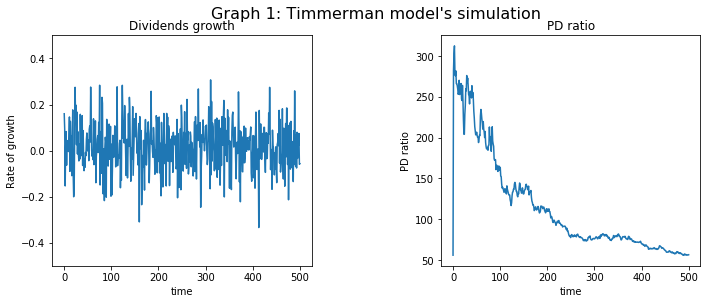

Text(0.5,1,'Graph 2: Distribution of PD ratio')

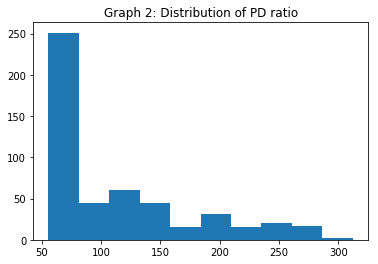

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

np.random.seed( 10 )
random.seed(10)

#Set the parameter values: 
mu=0.015
std=0.33
r=0.05
n=500


#True dgp for dividends:
eps=np.random.normal(0,pow(std,2),n)
DG=np.ones((n))
for t in range(n):
    DG[t]=mu + eps[t]

#Learning:
mu_hat=np.ones((n))
mu_hat[0]=0.034
for t in range(0, n-1):
    mu_hat[t+1]= (((n-1)/n)*mu_hat[t]) + (DG[t]/n)

var_hat=np.ones((n))
var_hat[0]=pow(0.15,2)
for t in range(0,n-1):
    var_hat[t+1]= ((n-1)/pow(n,2))*((n*var_hat[t]) + pow(mu_hat[t] - DG[t],2))

#Prices generating proces: 
PD=np.ones((n))
for t in range(n):
    if mu_hat[t]+var_hat[t]<np.log10(1+r):
        PD[t]= np.exp(mu_hat[t]+(var_hat[t]/2))/(1+r - np.exp(mu_hat[t]+(var_hat[t]/2)))
    else:
        PD[t]= np.exp(mu_hat[t-1]+(var_hat[t-1]/2))/(1+r - np.exp(mu_hat[t-1]+(var_hat[t-1]/2)))

#Return 
r=np.empty((n))
r[0]= 0.05
for t in range(1,n):
    r[t]=((PD[t]+1)/(PD[t-1]))*DG[t]


#PLOT
time=np.linspace(0,n,n)
plt.figure
plt.suptitle("Graph 1: Timmerman model's simulation", x=0.75, y=1, fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)


plt.subplot(121)
plt.plot(time,DG,)
#plt.plot(time,a, label= 'Perceived dgp')
#plt.legend()
plt.title('Dividends growth')
plt.ylim([-0.5,0.5])
plt.xlabel('time')
plt.ylabel('Rate of growth')

plt.subplot(122)
plt.plot(time,PD, label= 'PD ratio')
plt.title('PD ratio')
plt.xlabel('time')
plt.ylabel('PD ratio')
plt.show()

plt.hist(PD)
plt.title('Graph 2: Distribution of PD ratio')
        

Graph 1 plots the dividends exogenous stochastic process and the evolution of the PD ratio. Graph 2 pot the distribution of the PD ratio. At first sight, it looks like the model generates high volatility of the PD ratio. Let's check it out by reporting **descriptive statistics.**

In [15]:
#Report statistics
E_PD= np.mean(PD)
ST_PD=np.std(PD)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(PD).autocorr()
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
E_r=np.mean(r)
ST_r=np.std(r)

#Print them
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))

Expectation of PD ratio: 114.66
Volatility of PD ratio: 60.64
Relative volatility OF PD ratio: 0.53
Persistence of PD ratio: 0.98
Expectation of DG: 0.02
Volatility of DG: 0.10
Relative volatility of DG: 5.60
Expectation of r: 0.02
Volatility of r: 0.11


**Results**: With a particular set of parameter values, none of them specially unreasonable (note that the coefficient of variation of the dividends process is 5.6 here vs around 7 in AMN table's fact, which means that we create a process with less volatility than the actual one!), we are able to match:

- Fact 1: Volatility of the PD ratio. Note that the coefficient of variation is 0.53 and it is vs 0.5 in AMN paper. 
- Fact 2: Persistence of the PD ratio. We get 0.98 vs. 0.97 in AMN table. 
- Fact 3: we get a return standard deviation of 0.14 (over a mean of 0.02). AMN table report a std of 11.44, which probably is obtained using rate in %. Then, our simulation is not far from that figure. 

Now, let's do a Montercarlo simulation to check the robustness of our findings.

**Montecarlo simulation**

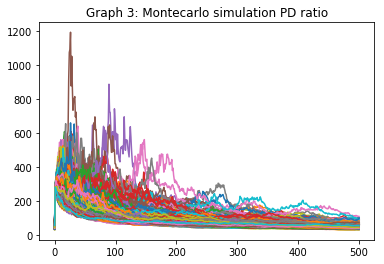

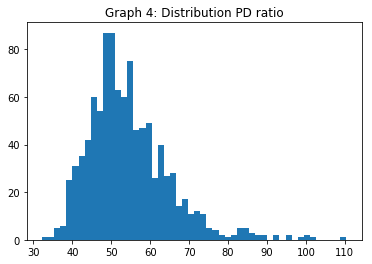

In [16]:
#1000 times Montecarlo experiment
np.random.seed( 10 )
random.seed(10)

#Set the parameter values: 
mu=0.015
std=0.33
r=0.05
n=500
time=np.linspace(0,n,n)
result=[]
rates=[]
for i in range(1000):
    eps=np.random.normal(0,pow(std,2),n)
    DG=np.ones((n))
    for t in range(n):
        DG[t]=mu + eps[t]
        
    mu_hat=np.ones((n))
    mu_hat[0]=0.034
    for t in range(0, n-1):
        mu_hat[t+1]= (((n-1)/n)*mu_hat[t]) + (DG[t]/n)

    var_hat=np.ones((n))
    var_hat[0]=pow(0.15,2)
    for t in range(0,n-1):
        var_hat[t+1]= ((n-1)/pow(n,2))*((n*var_hat[t]) + pow(mu_hat[t] - DG[t],2))

    #Prices generating proces: 
    PD=np.ones((n))
    for t in range(n):
        if mu_hat[t]+var_hat[t]<np.log10(1+r):
            PD[t]= np.exp(mu_hat[t]+(var_hat[t]/2))/(1+r - np.exp(mu_hat[t]+(var_hat[t]/2)))
        else:
            PD[t]= np.exp(mu_hat[t-1]+(var_hat[t-1]/2))/(1+r - np.exp(mu_hat[t-1]+(var_hat[t-1]/2)))

    #Return 
    rate=np.empty((n))
    rate[0]= 0.05
    for t in range(1,n):
        rate[t]=((PD[t]+1)/(PD[t-1]))*DG[t]
    plt.plot(time,PD)
    result.append(PD[-2]) #Append the ending value of each simulation. 
    rates.append(rate[-2])

#PLOT
plt.title('Graph 3: Montecarlo simulation PD ratio')
plt.show()
#create histogram of ending stock values for our multiple simulations
plt.hist(result,bins=50)
plt.title('Graph 4: Distribution PD ratio')
plt.show()    

Let's report the statistics.

In [17]:
E_PD= np.mean(result)
ST_PD=np.std(result)
CV_PD=ST_PD/E_PD
AC_PD=pd.Series(result).autocorr()
E_DG= np.mean(DG)
ST_DG= np.std(DG)
CV_DG=ST_DG/E_DG
E_r=np.mean(rates)
ST_r=np.std(rates)


print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(AC_PD))
print('Expectation of DG:', "{0:.2f}".format(E_DG))
print('Volatility of DG:', "{0:.2f}".format(ST_DG))
print('Relative volatility of DG:', "{0:.2f}".format(CV_DG))
print('Expectation of r:', "{0:.2f}".format(E_r))
print('Volatility of r:', "{0:.2f}".format(ST_r))

Expectation of PD ratio: 54.41
Volatility of PD ratio: 10.41
Relative volatility OF PD ratio: 0.19
Persistence of PD ratio: -0.03
Expectation of DG: 0.02
Volatility of DG: 0.10
Relative volatility of DG: 6.10
Expectation of r: 0.01
Volatility of r: 0.11


The results of the Montecarlo simulation are less succesful:

- The volatility of the PD is much lower than it should. 
- The persistence of the PD is negative and very low. 
- The only fact that seems working is the volatility of the returns. 

In a sense, this less triomphal results are natural: we are running the model for 500 periods 1000 times. So, the parameters should converge to the true ones (that's why, for instance, we do not observe persistence). 

All in all, the message of the Timmerman model is that it works quite well for replating some of the stylized facts, but we need something else for a good accountancy. 

<h3>Question 2: Simulation of the AMN's 2016 model.</h3>

Model of stock price growth learning. Notice that Timmerman's model was about dividend growth learning. 

The model boils down to 3 equations:

- Dividends exogenous dgp:


(1) $\frac{D_t}{D_{t-1}}=a\epsilon_t$, 
where $\epsilon$ follows a lognormal ($-s^2/2$, $s^2$). 

- Price growth process:

(2) $\frac{P_t}{P_{t-1}}=\big(1 + \frac{\delta \Delta \beta_t}{1 - \delta \beta_t}\big)a \epsilon_t$


- Learning process (agents make beliefs about the price growth): 

(3)  $\beta_t= \beta_{t-1} + \frac{1}{\alpha_t}\big(\big(\frac{D_{t}}{D_{t-1}}\big)^{-\sigma}\frac{P_t}{P_{t-1}}- \beta{t-1}\big)$

The algorithm works as follows (self referential process: actual price growth determine perceived price and the other way around): 

- Given $\beta_0$ and $\beta_1$, using (2) we get $\frac{P_1}{P_0}$.
- With $\frac{P_1}{P_0}$ using (3) we get $\beta_2$. 
- With $\beta_2$ (we have also $\beta_1$), using (2) we get $\frac{P_2}{P_1}$. And so on.

With these variables, we can get the PD ratio and the returns process like this (given an initial value for the PD ratio):

- PD ratio:

(4) $\frac{P_t}{D_t}= \frac{\delta \beta^{RE}}{1- \delta \beta_t}$

where $\beta^{RE} = a^{1-\sigma} e^{\sigma(1-\sigma)s^2/2}$

It is the RE expectation about the dividends growth. 

- Stock returns:

(5) $r_t^s= \frac{\frac{P_t}{D_t}+1}{\frac{P_{t-1}}{D_{t-1}}}\frac{D_t}{D_{t-1}}-1$